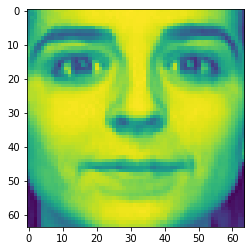

In [466]:
#3a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC




data = np.loadtxt("faces.dat.txt")
 

plt.imshow(data[99].reshape(64,64).T)
plt.show()
#plt.imshow(b[0][0][0])
#plt.show()

#from scipy.misc import toimage
#toimage(b).show()




In [467]:
mean_along_column_=data.mean(axis=1)
mean_along_column=np.reshape(mean_along_column_,(400,1))
#print(mean_along_column)

In [468]:
updated_matrix=data-mean_along_column
#print(updated_matrix)


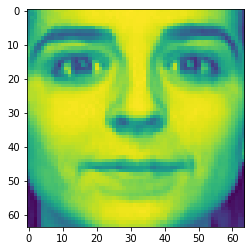

In [469]:
#3b
plt.imshow(updated_matrix[99].reshape(64,64).T)
plt.show()

In [470]:
#3c
pca=PCA().fit(updated_matrix)

In [471]:
eigenvectors=pca.components_
#print("Eigen Vectors",eigenvectors)
eigenvalues=pca.explained_variance_
#print("Eigen Values",eigenvalues)
eigenvalues_sorted=sorted(eigenvalues,reverse=True)
eigenvalues_sorted=np.reshape(eigenvalues_sorted,(400,1))
print(eigenvalues_sorted)

[[6.61431879e+05]
 [3.70763568e+05]
 [2.58827001e+05]
 [2.03902034e+05]
 [1.48244321e+05]
 [1.21765010e+05]
 [9.52196683e+04]
 [9.42274150e+04]
 [7.84084493e+04]
 [7.41043578e+04]
 [6.66325842e+04]
 [5.92682499e+04]
 [5.57082140e+04]
 [4.95071440e+04]
 [4.64767694e+04]
 [4.35642087e+04]
 [3.92698697e+04]
 [3.49307885e+04]
 [3.47484825e+04]
 [3.29450489e+04]
 [2.91287775e+04]
 [2.77328035e+04]
 [2.67372524e+04]
 [2.53939724e+04]
 [2.46445055e+04]
 [2.40121179e+04]
 [2.29783866e+04]
 [2.14252325e+04]
 [2.05126720e+04]
 [1.87355243e+04]
 [1.81640820e+04]
 [1.69982817e+04]
 [1.57154318e+04]
 [1.51213181e+04]
 [1.46517046e+04]
 [1.45656220e+04]
 [1.38709345e+04]
 [1.30751411e+04]
 [1.27928191e+04]
 [1.20792826e+04]
 [1.18781809e+04]
 [1.15760693e+04]
 [1.13248211e+04]
 [1.09299782e+04]
 [1.06925274e+04]
 [1.03901637e+04]
 [1.02991691e+04]
 [9.90733891e+03]
 [9.50330343e+03]
 [9.21556071e+03]
 [8.94032766e+03]
 [8.83790894e+03]
 [8.42590907e+03]
 [8.27341225e+03]
 [8.07097585e+03]
 [7.949950

Text(0, 0.5, 'Eigen Values')

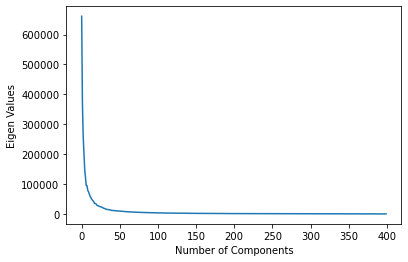

In [472]:
#3c
plt.plot(eigenvalues_sorted)
plt.xlabel("Number of Components")
plt.ylabel("Eigen Values")

#3d

Since from the eigen values we can say that the components captures some variance and after sorting the eigen values in descending order, we can figure out that as we go down the eigen values,the last component (eigen value) which was supposed to retain every feature of data is left with no data to project and thus can't be minimised further.

In [473]:
temp_matrix=sorted(zip(eigenvalues,eigenvectors),reverse=True)
#print(temp_matrix)
no_of_cmpts= list(range(0, 400)) 
a=np.reshape(no_of_cmpts,(400))

<BarContainer object of 400 artists>

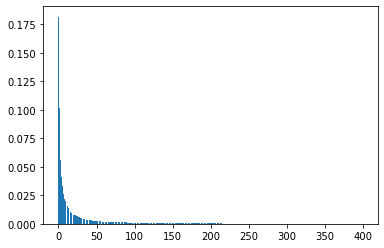

In [474]:
plt.bar(a,pca.explained_variance_ratio_)



#3e
It totally depends on the application i.e. how many principal components we want depends on how much variance we want to keep.
For different variance we'll get different number of components.
For example, if we take 80% of variance, there will be around 35 principal components.





In [475]:
df=pd.DataFrame(temp_matrix)
df.head(5)

,0,1
0,661431.879247,"[-0.02850114236549872, -0.02948162398024451, -..."
1,370763.567583,"[0.000913931995215167, -0.001678014977824105, ..."
2,258827.001416,"[0.010534626751105503, 0.00905113594014556, 0...."
3,203902.034412,"[-0.017121445915653455, -0.017284374351592302,..."
4,148244.321040,"[0.03143878980303175, 0.030489776845051282, 0...."


In [476]:
eigenvector1=temp_matrix[0][1]
eigenvector2=temp_matrix[1][1]
eigenvector3=temp_matrix[2][1]
eigenvector4=temp_matrix[3][1]
eigenvector5=temp_matrix[4][1]

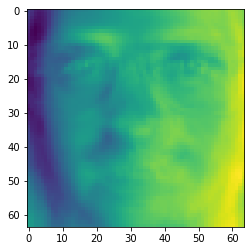

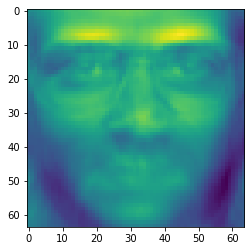

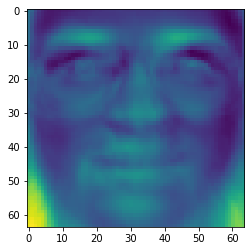

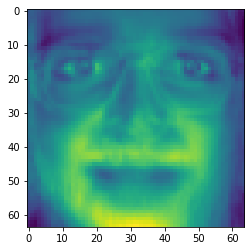

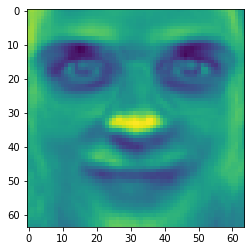

In [477]:
#3f
plt.imshow(eigenvector1.reshape(64,64).T)
plt.show()
plt.imshow(eigenvector2.reshape(64,64).T)
plt.show()
plt.imshow(eigenvector3.reshape(64,64).T)
plt.show()
plt.imshow(eigenvector4.reshape(64,64).T)
plt.show()
plt.imshow(eigenvector5.reshape(64,64).T)
plt.show()

In [478]:
#3g
#PCA WITH 10 Components
pca=PCA(10).fit(updated_matrix)

In [479]:
eigenvectors=pca.components_
#print("Eigen Vectors",eigenvectors)
eigenvalues=pca.explained_variance_
#print("Eigen Values",eigenvalues)


In [480]:
temp_matrix=sorted(zip(eigenvalues,eigenvectors),reverse=True)
#print(temp_matrix)


In [481]:
df=pd.DataFrame(temp_matrix)
df.head(10)

,0,1
0,661431.879247,"[-0.02850114236475561, -0.02948162397925132, -..."
1,370763.567583,"[0.0009139319456705841, -0.0016780150533709792..."
2,258827.001416,"[0.010534626555345337, 0.009051135699404203, 0..."
3,203902.034412,"[-0.017121451628429735, -0.017284383425596763,..."
4,148244.321028,"[0.03143886953703071, 0.030489914923714678, 0...."
5,121765.009465,"[-0.03419872874844422, -0.03288682905363536, -..."
6,95219.657454,"[0.03240038439889669, 0.03540576465006362, 0.0..."
7,94227.411635,"[0.020233701840266738, 0.019358096893738366, 0..."
8,78408.435020,"[0.015831529855502693, 0.018671921245627426, 0..."
9,74104.311881,"[0.035056020720207665, 0.034030395390806524, 0..."


[ -35.9028384   -35.79115875  -34.18519645 ... -114.73782476 -119.62718667
 -120.48121822]


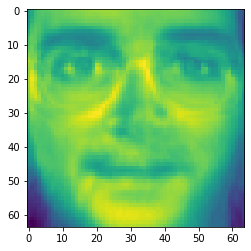

In [482]:
# Display the reconstructed 100th images using 10 principal components. 
sum_matrix=0
for i in range(0,10):
    data_matrix_10cmpts=temp_matrix[i][1]*(temp_matrix[i][1].T@ updated_matrix[99])
    sum_matrix=sum_matrix+data_matrix_10cmpts
print(sum_matrix)

plt.imshow(sum_matrix.reshape(64,64).T)
plt.show()

[ -44.54798948  -46.2266564   -50.40877493 ... -110.87154288 -106.24007851
 -115.80075966]


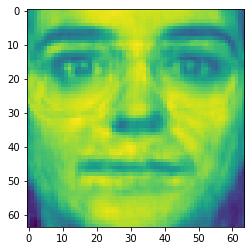

In [483]:
# Display the reconstructed 100th images using 100 principal components. 
pca=PCA(100).fit(updated_matrix)
eigenvectors=pca.components_
#print("Eigen Vectors",eigenvectors)
eigenvalues=pca.explained_variance_
#print("Eigen Values",eigenvalues)
temp_matrix=sorted(zip(eigenvalues,eigenvectors),reverse=True)
df=pd.DataFrame(temp_matrix)
df.head(100)
sum_matrix=0
for i in range(0,100):
    data_matrix_10cmpts=temp_matrix[i][1]*(temp_matrix[i][1].T@updated_matrix[99])
    sum_matrix=sum_matrix+data_matrix_10cmpts
print(sum_matrix)

plt.imshow(sum_matrix.reshape(64,64).T)


[ -45.4811242   -46.40178716  -49.5823685  ... -117.46927637 -108.54136444
 -113.61094792]


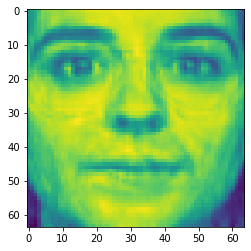

In [484]:
# Display the reconstructed 100th images using 200 principal components. 
pca=PCA(200).fit(updated_matrix)
eigenvectors=pca.components_
#print("Eigen Vectors",eigenvectors)
eigenvalues=pca.explained_variance_
#print("Eigen Values",eigenvalues)
temp_matrix=sorted(zip(eigenvalues,eigenvectors),reverse=True)
df=pd.DataFrame(temp_matrix)
df.head(200)
sum_matrix=0
for i in range(0,200):
    data_matrix_10cmpts=temp_matrix[i][1]*(temp_matrix[i][1].T@updated_matrix[99])
    sum_matrix=sum_matrix+data_matrix_10cmpts
print(sum_matrix)

plt.imshow(sum_matrix.reshape(64,64).T)


[ -58.11274579  -51.34789791  -55.67306501 ... -124.33163663 -118.12472157
 -119.30435917]


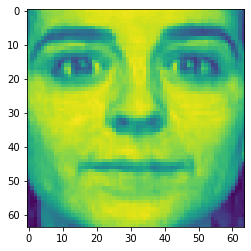

In [485]:
# Display the reconstructed 100th images using 399 principal components. 
pca=PCA(399).fit(updated_matrix)
eigenvectors=pca.components_
#print("Eigen Vectors",eigenvectors)
eigenvalues=pca.explained_variance_
#print("Eigen Values",eigenvalues)
temp_matrix=sorted(zip(eigenvalues,eigenvectors),reverse=True)
df=pd.DataFrame(temp_matrix)
df.head(399)
sum_matrix=0
for i in range(0,399):
    data_matrix_10cmpts=temp_matrix[i][1]*(temp_matrix[i][1].T@updated_matrix[99])
    sum_matrix=sum_matrix+data_matrix_10cmpts
print(sum_matrix)

plt.imshow(sum_matrix.reshape(64,64).T)
